In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train_transaction.csv')

In [3]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Dealing with NA
df.fillna(0, inplace=True)
#Variable Creation
df['has_r'] = (pd.notna(df['R_emaildomain'])).astype(int)
df['different_r'] = (df['has_r']) * (df.P_emaildomain == df.R_emaildomain).astype(int)
df['is_discover'] = (df.card4=='discover').astype(int)
df['is_credit'] = (df.card6=='credit').astype(int)
df['is_sketchy_addr2'] = (df.addr2.isin([0,60,96]))
df['is_na_M1'] = (df['M1']==0).astype(int)
df['is_na_M2'] = (df['M2']==0).astype(int)
df['is_na_M3'] = (df['M3']==0).astype(int)
df['is_na_M5'] = (df['M5']==0).astype(int)
df['is_na_M6'] = (df['M6']==0).astype(int)
df['is_na_M7'] = (df['M7']==0).astype(int)
df['is_na_M8'] = (df['M8']==0).astype(int)
df['is_na_M9'] = (df['M9']==0).astype(int)
df['is_big_NA'] = df['is_na_M1']*df['is_na_M2']*df['is_na_M3']*df['is_na_M5']*df['is_na_M6']*df['is_na_M7']*df['is_na_M8']*df['is_na_M9']

In [5]:
#Column Selection
def colSelect(cols):
    output = []
    for col in cols:
        if col=='isFraud':
            output.append(False)
        elif col[0]=='C':
            output.append(True)
        elif col[0]=='V':
            output.append(True)
        elif col[0]=='D':
            output.append(True)
        elif col in ['has_r', 'different_r']:
            output.append(True)
        elif col[0:2]=='is':
            output.append(True)
        else:
            output.append(False)
    return(output)

In [6]:
cols = df.columns[colSelect(df.columns)]

In [7]:
from xgboost import XGBClassifier

In [8]:
xgb1 = XGBClassifier(max_depth=5, n_jobs=4)

In [9]:
xgb1.fit(df[cols], df['isFraud'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [11]:
xgb1.predict_proba(df[cols])[0:5, 1]

array([0.15712702, 0.02852733, 0.01353451, 0.03463782, 0.00555718],
      dtype=float32)

In [12]:
df['preds'] = xgb1.predict_proba(df[cols])[:, 1]

In [13]:
from sklearn.metrics import auc, roc_curve

In [14]:
fpr, tpr, thresholds= roc_curve(df['isFraud'], df['preds'])

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

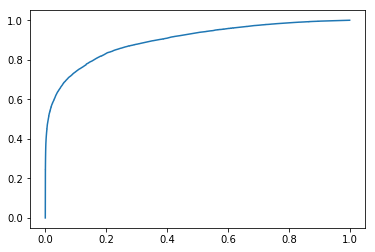

In [16]:
plt.plot(fpr, tpr)

In [17]:
auc(fpr, tpr)

0.8984449699832157

In [18]:
test = pd.read_csv('test_transaction.csv')

In [19]:
test.fillna(0, inplace=True)
#Variable Creation
test['has_r'] = (pd.notna(test['R_emaildomain'])).astype(int)
test['different_r'] = (test['has_r']) * (test.P_emaildomain == test.R_emaildomain).astype(int)
test['is_discover'] = (test.card4=='discover').astype(int)
test['is_credit'] = (test.card6=='credit').astype(int)
test['is_sketchy_addr2'] = (test.addr2.isin([0,60,96]))
test['is_na_M1'] = (test['M1']==0).astype(int)
test['is_na_M2'] = (test['M2']==0).astype(int)
test['is_na_M3'] = (test['M3']==0).astype(int)
test['is_na_M5'] = (test['M5']==0).astype(int)
test['is_na_M6'] = (test['M6']==0).astype(int)
test['is_na_M7'] = (test['M7']==0).astype(int)
test['is_na_M8'] = (test['M8']==0).astype(int)
test['is_na_M9'] = (test['M9']==0).astype(int)
test['is_big_NA'] = test['is_na_M1']*test['is_na_M2']*test['is_na_M3']*test['is_na_M5']*test['is_na_M6']*test['is_na_M7']*test['is_na_M8']*test['is_na_M9']

In [20]:
test['preds'] = xgb1.predict_proba(test[cols])[:, 1]

In [21]:
submission_df = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds']})

In [22]:
submission_df.to_csv('submission_2.csv', index=False)